In [ ]:
#importing libraries needed
import numpy as np
import matplotlib.pyplot as plt

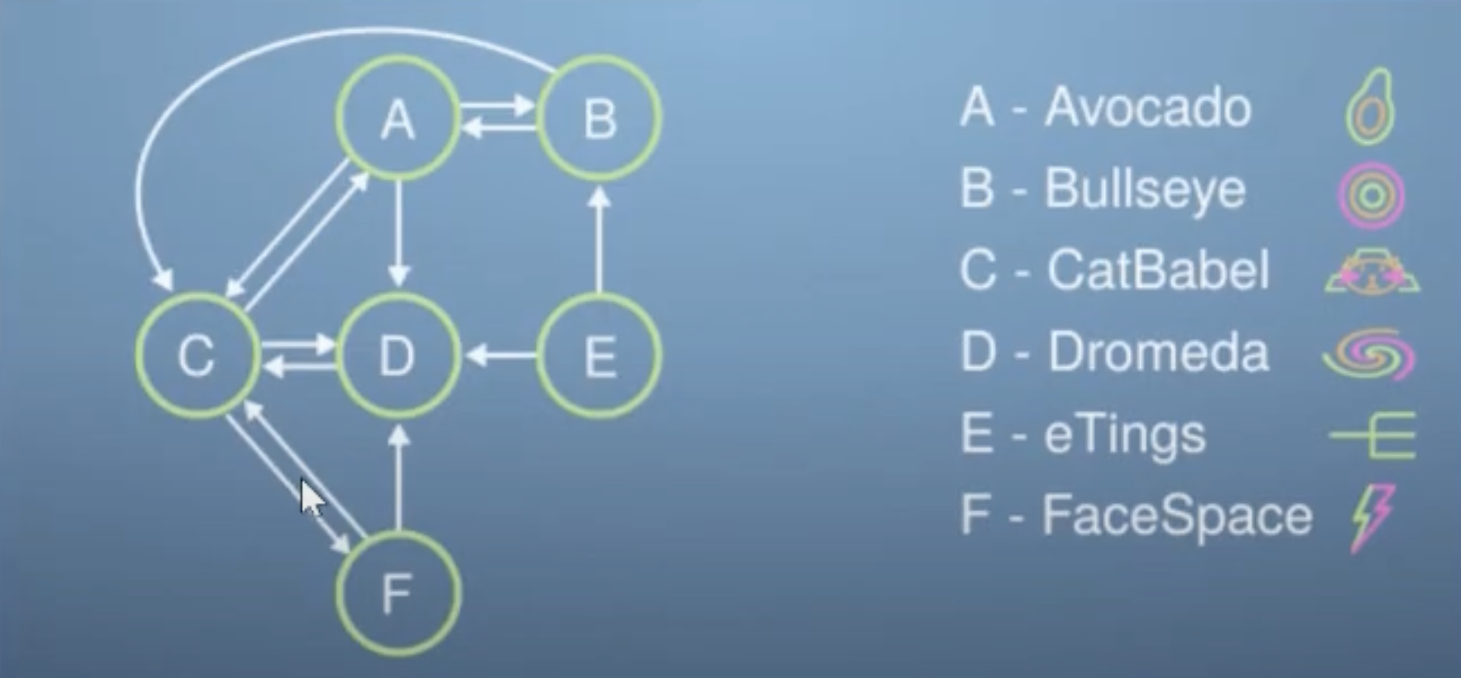

In [ ]:
#Input graph
WebG1=np.array([[0,1,1,1,0,0],
            [1,0,1,0,0,0],
            [1,0,0,1,0,1],
            [0,0,1,0,0,0],
            [0,1,0,1,0,0],
            [0,0,1,1,0,0]],dtype='float')

In [ ]:
#Converting to probablity 
for i in range(len(WebG1)):
  t=sum(WebG1[i])
  for j in range(len(WebG1)):
    if (t==0):
      WebG1[i,j]=0
    else:
      WebG1[i,j]=(WebG1[i,j]/t)
WebG1

array([[0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
        0.33333333],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , 0.5       , 0.        ,
        0.        ]])

In [ ]:
WebG1=np.transpose(WebG1)
WebG1

array([[0.        , 0.5       , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.33333333, 0.5       , 0.        , 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.5       ,
        0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        ]])

Finding dominant eigen vector in order to find the rank of corresponding pages

No of iterations is 14

Chances of landing in respective pages:
 [15.97482537  5.34757339 40.01106305 25.34926275  0.         13.31727545]

 Rank Page
  1     C
  2     D
  3     A
  4     F
  5     B
  6     E




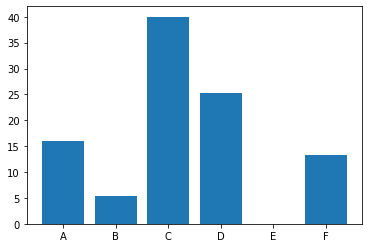

In [ ]:
def powerMethod(A,x0,e=0.001):  
    x1=None
    count=0
    while(1):
      y=np.dot(A,x0)
      maxi=float(max(np.abs(y)))
      y=y/maxi
      c=0
      count+=1
      for i in range(3):
          if abs(y[i]-x0[i])<e:
              c+=1
      if c==3:
          break
      x1=x0
      x0=y
    insy=0
    insx=0
    y=np.dot(A,x1)
    print('No of iterations is '+str(count),end='\n\n')
    return y
r=powerMethod(WebG1,[1]*len(WebG1))
rank=100*np.real(r/sum(r))
print("Chances of landing in respective pages:\n",rank,end='\n\n')

sorted_value_index=np.argsort(rank)[::-1]
page=[chr(ord('A')+i) for i in range(6)]
print(' Rank Page')
plt.bar(page,rank)
for i in range(6):
  print(" ",i+1,"   ",page[sorted_value_index[i]])
print('\n')

Higher the rank indicates higher possibility of user visiting that page
in this case



We are adding one more page to the web 


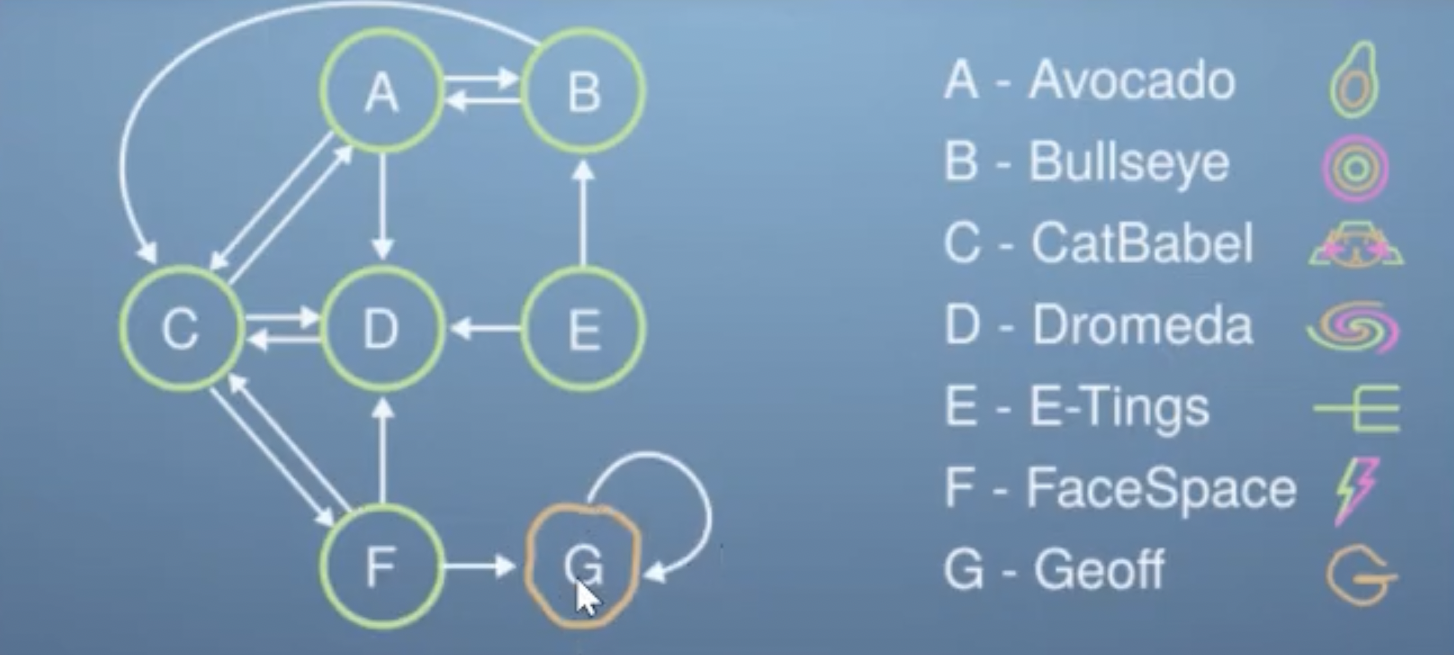

In [ ]:
WebG2=np.array([[0,1,1,1,0,0,0],
                [1,0,1,0,0,0,0],
                [1,0,0,1,0,1,0],
                [0,0,1,0,0,0,0],
                [0,1,0,1,0,0,0],
                [0,0,1,1,0,0,1],
                [0,0,0,0,0,0,1]],dtype='float')
for i in range(len(WebG2)):
  t=float(sum(WebG2[i]))
  for j in range(len(WebG2)):
    if (t==0):
      WebG2[i,j]=0
    else:
      WebG2[i,j]=(WebG2[i,j]/t)
WebG2=np.transpose(WebG2)
print(WebG2)

[[0.         0.5        0.33333333 0.         0.         0.
  0.        ]
 [0.33333333 0.         0.         0.         0.5        0.
  0.        ]
 [0.33333333 0.5        0.         1.         0.         0.33333333
  0.        ]
 [0.33333333 0.         0.33333333 0.         0.5        0.33333333
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


Adding 1 page almost doubled the number of iterations in order to find the ranks.

No of iterations is 62

Chances of landing in respective pages:
 [ 0.8448581   0.29511088  1.97603548  1.22644484  0.          0.69023373
 94.96731698]

 Rank Page
  1     G
  2     C
  3     D
  4     A
  5     F
  6     B
  7     E




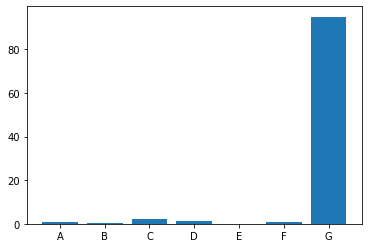

In [ ]:
r=powerMethod(WebG2,[1]*len(WebG2))
rank=100*np.real(r/sum(r))
print("Chances of landing in respective pages:\n",rank,end='\n\n')

sorted_value_index=np.argsort(rank)[::-1]
page=[chr(ord('A')+i) for i in range(7)]
plt.bar(page,rank)
print(' Rank Page')
for i in range(7):
  print(" ",i+1,"   ",page[sorted_value_index[i]])
print('\n')

This is not good beacuse almost all the traffic is taken by page G. So in order to combat this we can add a small probability that user doesn't follow the link on the webpage(random link is selected). Let d be the probability that the user follows a link on the webpage and (1-d) be the probability of the user navigating towards a random link. Whatever we have seen earlier is the case where d=1. If d=0 user always goes to a random page meaning all pages will be equally ranked.A new matrix is calculated after each user visits the website

M=dL+((1-d)/n)*J


J is a matrix containg all ones
d can be chose randomly

The earlier graph WebG is the required L. So renaming them

In [ ]:
L1=WebG1
L2=WebG2
d=0.8
n=len(L2)
J=np.ones([n,n])

In [ ]:
M=d*L2+((1-d)/n)*J

No of iterations is 20

Chances of landing in respective pages:
 [12.38342161  7.30334969 24.75655338 16.43167042  2.85714286  9.46149667
 26.80636537]

 Rank Page
  1     G
  2     C
  3     D
  4     A
  5     F
  6     B
  7     E




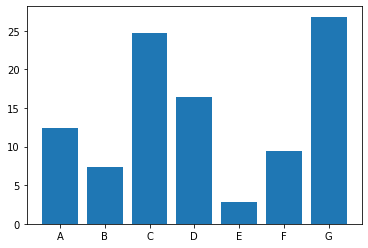

In [ ]:
r=powerMethod(M,[1]*len(WebG2))
rank=100*np.real(r/sum(r))
print("Chances of landing in respective pages:\n",rank,end='\n\n')

sorted_value_index=np.argsort(rank)[::-1]
page=[chr(ord('A')+i) for i in range(7)]
plt.bar(page,rank)
print(' Rank Page')
for i in range(7):
  print(" ",i+1,"   ",page[sorted_value_index[i]])
print('\n')

This method still predicts the page G has better rank but it gives more sensible probability of an user ending up at that page. Value changes with respect to d

Performing the same for an arbitrarily large matrix. Generating a webpage with n nodes

In [ ]:
import random

In [ ]:
n=int(input("Enter the number of nodes : "))
internet=np.ones([n,n])
for i in range(n):
  for j in range(n):
    internet[i,j]=float(random.randint(0,1))
internet

In [ ]:
def pagerank(internet,d):
  n=len(internet)
  for i in range(n):
    t=sum(internet[i,:])
    for j in range(n):
      if (t==0):
        internet[i,j]=0
      else:
        internet[i,j]=(internet[i,j]/t)
  internet=np.transpose(internet)
  J=np.ones([n,n])
  M=d*internet+((1-d)/n)*J
  r=powerMethod(M,[1]*n)
  rank=100*np.real(r/sum(r))
  print("Chances of landing in respective pages:\n\n",rank)
  
  sorted_value_index=np.argsort(rank)[::-1]
  print('\n')
  page=[chr(ord('A')+i) for i in range(n)]
  plt.bar(page,rank)
  print(' Rank Page')
  for i in range(n):
    print(" ",i+1,"   ",page[sorted_value_index[i]])
  print('\n')

In [ ]:
pagerank(internet,0.8)

In [ ]:
internet=np.array([[0,1,1,1,0,0,0],
                [1,0,1,0,0,0,0],
                [1,0,0,1,0,1,0],
                [0,0,1,0,0,0,0],
                [0,1,0,1,0,0,0],
                [0,0,1,1,0,0,1],
                [0,0,0,0,0,0,1]],dtype='float')
pagerank(internet,0.8)

Page Rank Algorithm in Data Mining


https://www.geeksforgeeks.org/page-rank-algorithm-in-data-mining/

Whatever we have done is similar to this but if required we can do it again. It is also finding rank. But we won't be making use of linear algebra


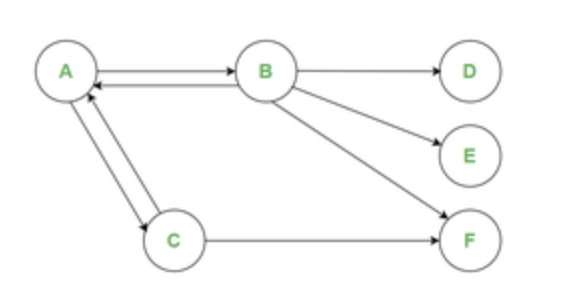

PR(A) = (1-d) + d * [PR(B) / Cout(B) + PR(C) / Cout(C)+ ...... + PR(N) / Cout(N)] similarly for all other nodes. Initially probability of visting any page is same


In [ ]:
internet=np.array([[0,1,1,0,0,0],
                   [1,0,0,1,1,1],
                   [1,0,0,0,1,1],
                   [0,0,0,0,0,0],
                   [0,0,0,0,0,0],
                   [0,0,0,0,0,0]],dtype='float')
n=len(internet)
prob=[1/n]*n
no_of_iter=2
d=0.8
table=np.ones([n,no_of_iter+1])
page=[chr(ord('A')+i) for i in range(n)]
table[:,0]=prob
for k in range(no_of_iter):
  for i in range(n):
    temp=0
    for j in range(n):
      sum1=np.sum(internet[j])
      if (sum1==0):
        continue
      else:
        temp=temp+internet[j,i]*(prob[j]/sum1)
    prob[i]=(1-d)+d*temp
  table[:,k+1]=prob

for i in range(n):
  print(page[i],round(table[i,0],5),round(table[i,1],5),round(table[i,2],5))
rank=table[:,2]
print('\n')

plt.bar(page,rank)

sorted_value_index=np.argsort(rank)[::-1]
print(' Rank Page')
for i in range(n):
  print(" ",i+1,"   ",page[sorted_value_index[i]])
print('\n')

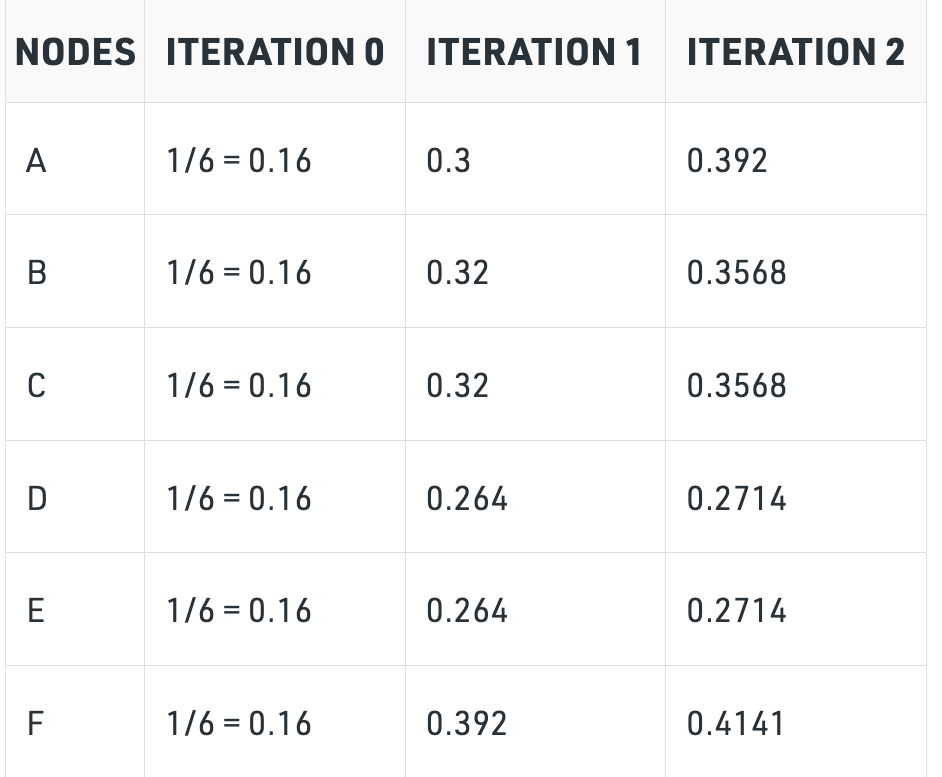

In [ ]:
internet=np.array([[0,1,1,0,0,0],
                   [1,0,0,1,1,1],
                   [1,0,0,0,0,1],
                   [0,0,0,0,0,0],
                   [0,0,0,0,0,0],
                   [0,0,0,0,0,0]],dtype='float')
pagerank(internet,0.8)